In [1]:
# various tools

RR = RealField(2048)

from random import shuffle

img = sqrt(-1)

def frange(a,b,s):
    L=[]
    t = a
    while(t<b):
        L.append(t)
        t += s
    return L

def root_Hermite(b):
    b = RR(b)
    return RR(( (b/(2*pi*e))*((pi*b)^(1/b)))^(1/(2*(b-1))))

'''
@return the length of the vectors produced by the short vector sampler
@param d: dimension of the lattice
@param V: the volume of the lattice
@param b0: beta_0
@param b1: beta_1
'''
def short_vector_length(d, V, b0, b1):
    d = RR(d)
    V = RR(V)
    b0 = RR(b0)
    b1 = RR(b1)
    return RR( sqrt(4/3) * (V^(1/d)) * (root_Hermite(b1)^(b1-1)) * (root_Hermite(b0)^(d - b1)) )

def B(alpha, x):
    alpha = RR(alpha)
    x = RR(x)
    if x < 1e-100:
        return RR(1)
    return RR( RR(gamma(RR(alpha+RR(1))) * bessel_J(alpha, x)) / RR((x/RR(2))^alpha) )

In [ ]:
'''
@param T: threshold
@param N: number of short vectors sampled
@param alpha: the parameter of the centered binomial of the LWE oracle
@param q: the size of the field
@param m: the number of rows of the matrix A
@param nlat: the dimension of the lattice part
@param nfft: the length of the lossy source code
@param kfft: the dimension of the lossy source code
@param dlat: the radius of the ball in which the sampled short vectors are drawn uniformly
@param dlsc: the average decoding distance
@param slsc: the standard deviation of the decoding distance
'''

<b> Ball Radius $\leftrightarrow$ Average Length </b>

Let $r$ be the radius of the $n$-dimensional Euclidean ball $\mathsf{Ball}^n_r$ centered in $0$. Then the average length of a vector drawn uniformly at random in $\mathsf{Ball}^n_r$ is:
$$
\begin{array}{lcl}
\ell & := & \int_{x=0}^{r} x \cdot \frac{\mathrm{vol}\left( \mathsf{Sphere}^n_x \right)}{\mathrm{vol}\left( \mathsf{Ball}^n_r \right)} dx \\
& = & \int_{x=0}^{r} x \tfrac{2 x^{n-1}\Gamma(n/2 + 1)}{\Gamma(n/2) r^n} dx \\
& = & \tfrac{n}{r^n} \int_{x=0}^{r} x^{n} dx \\
& = & \tfrac{n}{n+1} r \\
\end{array}
$$
So we can easily go from a ball radius to an average length and vice versa.<br>


The standard deviation of this distribution is
$$
\begin{array}{lcl}
\sigma & := & \sqrt{\int_{x=0}^{r} x^2 \cdot \frac{\mathrm{vol}\left( \mathsf{Sphere}^n_x \right)}{\mathrm{vol}\left( \mathsf{Ball}^n_r \right)} dx - \left( \tfrac{n}{n+1} \right)^2 r^2} \\
& = & \sqrt{ \int_{x=0}^{r} x^2 \cdot \tfrac{2 x^{n-1}\Gamma(n/2 + 1)}{\Gamma(n/2) r^n} dx  - \left( \tfrac{n}{n+1} \right)^2 r^2 } \\
& = & \sqrt{ \tfrac{n}{r^n} \int_{x=0}^{r} x^{n+1} dx  - \left( \tfrac{n}{n+1} \right)^2 r^2 } \\
& = & r \sqrt{ \tfrac{n}{n+2} - \left( \tfrac{n}{n+1} \right)^2} \\
& = & r \sqrt{ 1 - \tfrac{2}{n+2} - \left( 1 - \tfrac{1}{n+1} \right)^2} \\
& = & r \sqrt{ - \tfrac{2}{n+2} + \tfrac{2}{n+1} - \tfrac{1}{(n+1)^2}} \\
& = & r \sqrt{ 2 \left( \tfrac{1}{n+1} - \tfrac{1}{n+2} \right) - \tfrac{1}{(n+1)^2}} \\
& = & r \sqrt{ \tfrac{2}{(n+1)(n+2)} - \tfrac{1}{(n+1)^2}} \\
& = & r \sqrt{ \tfrac{1}{n+1} \left(\tfrac{2}{n+2} - \tfrac{1}{n+1} \right)} \\
& = & r \sqrt{ \tfrac{1}{n+1} \left(\tfrac{2n + 2 - n - 2}{(n+2)(n+1)} \right)} \\
& = & \tfrac{r}{n+1} \sqrt{ \tfrac{n}{n+2}} \\
\end{array}
$$

In [2]:
N = RR(25971)
q = RR(241)
alpha = RR(2)
m = RR(40)
nlat = RR(35)
nfft = RR(8)
kfft = RR(3)
nen = RR(0)
n = nlat + nfft + nen

beta0=RR(37)
beta1=RR(44)
avg_dlat=RR(40.813578)
sdv_dlat=RR(1.100488)
avg_dlsc=RR(23.819158)
sdv_dlsc=RR(3.370136)

dlat_theo = RR(short_vector_length(m+nlat, q^nlat, beta0, beta1))
dlsc_theo = RR( ((q^(1-kfft/nfft)) * (gamma(nfft/2 + 1)^(1/nfft)) / sqrt(pi)))

dlsc_theo = RR( (q^(1-kfft/nfft)) * sqrt(nfft/(2*pi*e)))

dlat = avg_dlat * (beta1+1) / beta1
slat = dlat * sqrt(beta1/(beta1+2)) / (beta1+1)

print("theoretical dlat: ", dlat_theo.n())
print("average dlat: ", avg_dlat.n())
print("dlat: ", dlat.n())
print("standard deviation of dlat: ", sdv_dlat.n())
print("standard deviation of dlat if in a ball: ", slat.n())
print()
print("theoretical dlsc: ", dlsc_theo.n())
print("average dlsc: ", avg_dlsc.n())
print("standard deviation of dlsc: ", sdv_dlsc.n())
print()

theoretical dlat:  37.3658224277474
average dlat:  40.8135780000000
dlat:  41.7411593181818
standard deviation of dlat:  1.10048800000000
standard deviation of dlat if in a ball:  0.907192425790745

theoretical dlsc:  21.0896061811695
average dlsc:  23.8191580000000
standard deviation of dlsc:  3.37013600000000



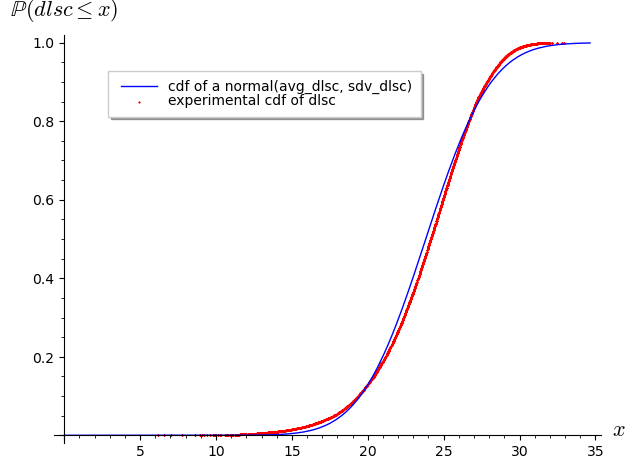

In [3]:
# Distribution of dlsc
path = "data/distrib/"
filename = "NormErrorLsc_q{}_m{}_n{}_nfft{}_kfft{}_nlat{}_beta0{}_beta1{}_N{}.out".format(int(q),int(m),int(n),int(nfft),int(kfft),int(nlat),int(beta0),int(beta1),int(N))
isfile = os.path.isfile(path + filename)
if(isfile):
    text_file = open(os.path.join(path, filename), 'r')
    myline = text_file.readline()
    data = []
    while myline:
        if myline[0]!='#':
            data.append(float(myline[:-1]))
        myline = text_file.readline()
    data.sort()
    data_max = data[-1]+1
    cdf = []
    nb_data = len(data)
    for i in range(nb_data-1):
        if data[i] < data[i+1]:
            cdf.append([data[i], float((i+1)/nb_data)])
    cdf.append([data[i], 1.0])
    plt_exprmnt = list_plot(cdf, marker='x', size=1, color='red', legend_label='experimental cdf of dlsc')
plt_theo = plot(lambda x: 0.5*(1.0 + erf((x - avg_dlsc)/(sdv_dlsc*sqrt(2)))), 0, data_max, color='blue', legend_label='cdf of a normal(avg_dlsc, sdv_dlsc)') 


plt = plt_theo + plt_exprmnt
plt.axes_labels(['$x$', '$\\mathbb{P}(dlsc \\leq x)$'])
plt.set_legend_options(handlelength=3.2, loc=(0.1,0.8), font_size=10)
plt.show()

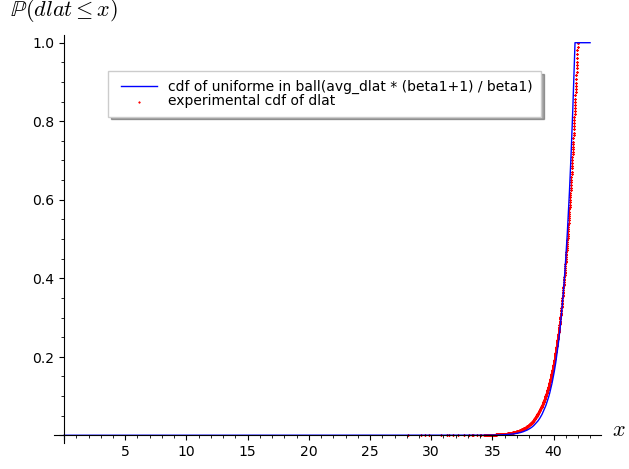

In [5]:
# Distribution of dlat
path = "data/distrib/"
filename = "NormShortVectors_q{}_m{}_n{}_nfft{}_kfft{}_nlat{}_beta0{}_beta1{}_N{}.out".format(int(q),int(m),int(n),int(nfft),int(kfft),int(nlat),int(beta0),int(beta1),int(N))
isfile = os.path.isfile(path + filename)
if(isfile):
    text_file = open(os.path.join(path, filename), 'r')
    myline = text_file.readline()
    data = []
    while myline:
        if myline[0]!='#':
            data.append(float(myline[:-1]))
        myline = text_file.readline()
    data.sort()
    data_max = data[-1]+1
    cdf = []
    nb_data = len(data)
    for i in range(nb_data-1):
        if data[i] < data[i+1]:
            cdf.append([data[i], float((i+1)/nb_data)])
    cdf.append([data[i], 1.0])
    plt_exprmnt = list_plot(cdf, marker='x', size=1, color='red', legend_label='experimental cdf of dlat')
plt_theo = plot(lambda x: min(1, (x/dlat)^beta1), 0, data_max, color='blue', legend_label='cdf of uniforme in ball(avg_dlat * (beta1+1) / beta1)') 

plt = plt_theo + plt_exprmnt
plt.axes_labels(['$x$', '$\\mathbb{P}(dlat \\leq x)$'])
plt.set_legend_options(handlelength=3.2, loc=(0.1,0.8), font_size=10)
plt.show()

<b>Good Guess</b>

$$
\begin{array}{lcl}
P_\mathsf{good} & := & \mathbb{P}\left( F^{(\mathsf{lsc})}_{\mathbf{s}_{\mathsf{enu}}} \left( \mathbf{G}^{\top} \mathbf{s}_{\mathsf{fft}} \right) \geq T \right) \\
& \approx & 0.5
\end{array}
$$
if
$$
\frac{T}{N} = \frac{\exp\left( \tfrac{-\alpha(\pi \mu_{lsc}/q)^2}{1 + 2 \alpha (\pi \sigma_{lsc}/q)^2}\right)}{\sqrt{1 + 2 \alpha (\pi \sigma_{lsc}/q)^2}} \cdot \int_0^1 \beta_{sieve} \cdot t^{\beta_{sieve} - 1} \cdot e^{-\alpha\left( \frac{\pi d_{lat} t}{q}\right)^2} dt
$$

In [8]:
# File 1: Pgood_q241_m40_n43_nfft8_kfft3_nlat35_beta032_beta144_N25971.out.out
N = RR(25971)
q = RR(241)
alpha = RR(2)
m = RR(40)
nlat = RR(35)
nfft = RR(8)
kfft = RR(3)
nen = RR(0)
n = nlat + nfft + nen

beta0=RR(32)
beta1=RR(44)
avg_dlat=RR(41.071674)
sdv_dlat=RR(1.125372)
avg_dlsc=RR(23.939202)
sdv_dlsc=RR(3.374912)

dlat_theo = RR(short_vector_length(m+nlat, q^nlat, beta0, beta1))
dlsc_theo = RR( ((q^(1-kfft/nfft)) * (gamma(nfft/2 + 1)^(1/nfft)) / sqrt(pi)))

dlsc_theo = RR( (q^(1-kfft/nfft)) * sqrt(nfft/(2*pi*e)))

dlat = avg_dlat * (beta1+1) / beta1
slat = dlat * sqrt(beta1/(beta1+2)) / (beta1+1)

print("theoretical dlat: ", dlat_theo.n())
print("average dlat: ", avg_dlat.n())
print("dlat: ", dlat.n())
print("standard deviation of dlat: ", sdv_dlat.n())
print("standard deviation of dlat if in a ball: ", slat.n())
print()
print("theoretical dlsc: ", dlsc_theo.n())
print("average dlsc: ", avg_dlsc.n())
print("standard deviation of dlsc: ", sdv_dlsc.n())
print()

theoretical dlat:  37.2833787533740
average dlat:  41.0716740000000
dlat:  42.0051211363636
standard deviation of dlat:  1.12537200000000
standard deviation of dlat if in a ball:  0.912929309146742

theoretical dlsc:  21.0896061811695
average dlsc:  23.9392020000000
standard deviation of dlsc:  3.37491200000000



median_theo =  12020.202677988445
expectation =  11983.50504751896
std dev =  1719.8711836709413
median =  11964.145100986709


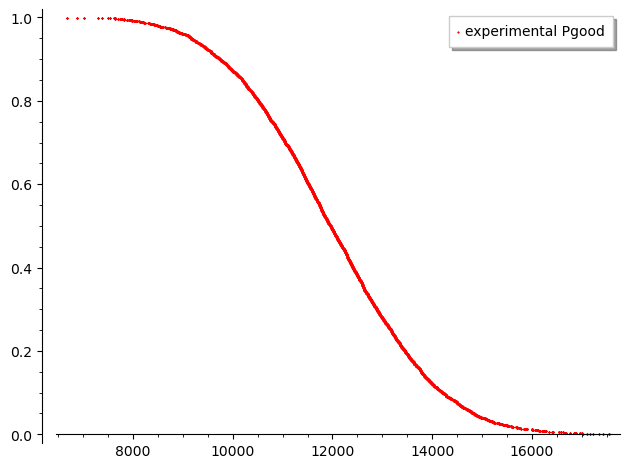

prob(experimental score > median_theo) =  0.487


In [9]:
# theoretical median (approx theoretical expectation)
median_theo = N
median_theo *= float(beta1 * numerical_integral(lambda t: t^(beta1 - 1) * exp(-alpha*(pi*t*dlat/q)^2), 0, 1)[0])
median_theo *= float(exp(-alpha * (pi*avg_dlsc/q)^2 / (1 + 2*alpha*(pi*sdv_dlsc/q)^2)))
median_theo /= float(sqrt(1 + 2*alpha*(pi*sdv_dlsc/q)^2))
print("median_theo = ", median_theo)

# experimental results for Pgood
path = "data/"
filename = "Pgood_q{}_m{}_n{}_nfft{}_kfft{}_nlat{}_beta0{}_beta1{}_N{}.out".format(int(q),int(m),int(n),int(nfft),int(kfft),int(nlat),int(beta0),int(beta1),int(N))
isfile = os.path.isfile(path + filename)
if(isfile):
    text_file = open(os.path.join(path, filename), 'r')
    myline = text_file.readline()
    data = []
    expect_data = 0
    var_data = 0
    while myline:
        if myline[0]!='#':
            val = float(myline[:-1])
            data.append(val)
            expect_data += val
            var_data += val*val
        myline = text_file.readline()
    data.sort()
    data_max = data[-1]+1
    survival_func = []
    survival_median = 0
    nb_data = len(data)
    print("expectation = ", float(expect_data/nb_data))
    print("std dev = ", sqrt(float(var_data/nb_data - (expect_data/nb_data)^2)))
    median = 0
    for i in range(nb_data-1):
        if data[i] < data[i+1]:
            survival_func.append([float(data[i]), 1-float((i+1)/nb_data)])
            if median==0 and 1-float((i+1)/nb_data) <= 0.5:
                median = float(data[i])
            if survival_median ==0 and data[i] >= median_theo:
                survival_median = 1-float((i+1)/nb_data)
    survival_func.append([float(data[i]), 0.0])
    print("median = ", median)
    plt_Pgood_exprmnt = list_plot(survival_func, marker='x', size=1, color='red', legend_label='experimental Pgood')
    plt_Pgood_exprmnt.show()


print("prob(experimental score > median_theo) = ", survival_median)

<b>Wrong Guess</b>

We assume that $(\widetilde{\mathbf{s}_{\mathsf{enu}}}, \widetilde{\mathbf{s}_{\mathsf{fft}}}) \neq (\mathbf{s}_{\mathsf{enu}}, \mathbf{s}_{\mathsf{fft}})$.


$$
\begin{array}{lcl}
P_\mathsf{wrong} & := & \mathbb{P}\left( F^{(\mathsf{lsc})}_{\widetilde{\mathbf{s}_{\mathsf{enu}}}} \left( \mathbf{G}^{\top} \widetilde{\mathbf{s}_{\mathsf{fft}}} \right) \geq T \right) \\
& \approx & \mathbb{P}\left( \mathcal{D} + \mathcal{N}\left(0, \sqrt{N/2}\right) \geq T \right) \\
& \approx &  \displaystyle{\int_{\mathbb{R}}} \displaystyle{\int_{\mathbb{R}^+}} \psi_\mathsf{lsc}(d_\mathsf{lsc})  \left( \min\left( 1 , \displaystyle{\int_{\mathcal{E}(T-t)}} \lambda(i) \mu(j) d(i,j) \right)\right) \cdot \tfrac{e^{-t^2/N}}{\sqrt{\pi N}}  dd_\mathsf{lsc} \; dt
\end{array}
$$
where
$$
\mathcal{E}(T-t) := \{ (i,j) \; : \;  N \cdot G(i,j) \geq T - t\}
$$
$$
G(i,j) := B\left( \tfrac{\beta_{\mathsf{sieve}}}{2}, \tfrac{2 \pi}{q} d_{\mathsf{lat}} i\right) \cdot B\left( \tfrac{n_{\mathsf{fft}}}{2} - 1, \tfrac{2 \pi}{q} d_{\mathsf{lsc}} j\right)
$$
and
$$
B(\alpha, x) := \frac{\Gamma(\alpha + 1) J_{\alpha}(x)}{(x/2)^{\alpha}}
$$
and 
$$
d_\mathsf{lsc} \sim \mathcal{N}(\mu_{\mathsf{lsc}}, \sigma_{\mathsf{lsc}})
$$
and
$$
\lambda(i) := \frac{2 \cdot \delta(\beta_{\mathsf{bkz}})^{\beta_{\mathsf{sieve}}(m + n_\mathsf{lat} - \beta_{\mathsf{sieve}})} \cdot \pi^{(\beta_{\mathsf{sieve}})/2} \cdot i^{\beta_{\mathsf{sieve}}-1}}{q^{\beta_{\mathsf{sieve}} \cdot \tfrac{m}{m + n_\mathsf{lat}}} \cdot \Gamma\left(\frac{\beta_{\mathsf{sieve}}}{2}\right)} 
$$ 
and
$$
\mu(j) := \frac{2 \cdot \pi^{n_{\mathsf{fft}}/2} \cdot j^{n_{\mathsf{fft}}-1}}{q^{k_{\mathsf{fft}}} \cdot \Gamma\left(\frac{n_{\mathsf{fft}}}{2}\right)} 
$$




In [16]:
# File 2: Pwrong_q241_m40_n43_nfft8_kfft3_nlat35_beta032_beta144_N25971.out
N = RR(25971)
q = RR(241)
alpha = RR(2)
m = RR(40)
nlat = RR(35)
nfft = RR(8)
kfft = RR(3)
nen = RR(0)
n = nlat + nfft + nen

beta0=RR(32)
beta1=RR(44)
avg_dlat=RR(41.068986)
sdv_dlat=RR(1.125823)
avg_dlsc=RR(23.938828)
sdv_dlsc=RR(3.378998)

dlat_theo = RR(short_vector_length(m+nlat, q^nlat, beta0, beta1))
dlsc_theo = RR( ((q^(1-kfft/nfft)) * (gamma(nfft/2 + 1)^(1/nfft)) / sqrt(pi)))

dlsc_theo = RR( (q^(1-kfft/nfft)) * sqrt(nfft/(2*pi*e)))

dlat = avg_dlat * (beta1+1) / beta1
slat = dlat * sqrt(beta1/(beta1+2)) / (beta1+1)

print("theoretical dlat: ", dlat_theo.n())
print("average dlat: ", avg_dlat.n())
print("dlat: ", dlat.n())
print("standard deviation of dlat: ", sdv_dlat.n())
print("standard deviation of dlat if in a ball: ", slat.n())
print()
print("theoretical dlsc: ", dlsc_theo.n())
print("average dlsc: ", avg_dlsc.n())
print("standard deviation of dlsc: ", sdv_dlsc.n())
print()

theoretical dlat:  37.2833787533740
average dlat:  41.0689860000000
dlat:  42.0023720454545
standard deviation of dlat:  1.12582300000000
standard deviation of dlat if in a ball:  0.912869561058973

theoretical dlsc:  21.0896061811695
average dlsc:  23.9388280000000
standard deviation of dlsc:  3.37899800000000



In [166]:
# File 3: Pwrong_q241_m40_n43_nfft8_kfft3_nlat35_beta037_beta144_N200001.out
N = RR(200001)
q = RR(241)
alpha = RR(2)
m = RR(40)
nlat = RR(35)
nfft = RR(8)
kfft = RR(3)
nen = RR(0)
n = nlat + nfft + nen

beta0=RR(37)
beta1=RR(44)
avg_dlat=RR(43.229753)
sdv_dlat=RR(1.125667)
avg_dlsc=RR(23.849187)
sdv_dlsc=RR(3.350470)

dlat_theo = RR(short_vector_length(m+nlat, q^nlat, beta0, beta1))
dlsc_theo = RR( ((q^(1-kfft/nfft)) * (gamma(nfft/2 + 1)^(1/nfft)) / sqrt(pi)))

dlsc_theo = RR( (q^(1-kfft/nfft)) * sqrt(nfft/(2*pi*e)))

dlat = avg_dlat * (beta1+1) / beta1
slat = dlat * sqrt(beta1/(beta1+2)) / (beta1+1)

print("theoretical dlat: ", dlat_theo.n())
print("average dlat: ", avg_dlat.n())
print("dlat: ", dlat.n())
print("standard deviation of dlat: ", sdv_dlat.n())
print("standard deviation of dlat if in a ball: ", slat.n())
print()
print("theoretical dlsc: ", dlsc_theo.n())
print("average dlsc: ", avg_dlsc.n())
print("standard deviation of dlsc: ", sdv_dlsc.n())
print()

theoretical dlat:  37.3658224277474
average dlat:  43.2297530000000
dlat:  44.2122473863636
standard deviation of dlat:  1.12566700000000
standard deviation of dlat if in a ball:  0.960898465956715

theoretical dlsc:  21.0896061811695
average dlsc:  23.8491870000000
standard deviation of dlsc:  3.35047000000000



[0, 0.0] ,
[1, 0.0] ,
[3, -0.00028664286668693927] ,
[7, -0.14250189454165288] ,
[15, -1.2679917601142836] ,
[31, -3.757808621709846] ,
[63, -7.2007587705151765] ,
[95, -9.483226767637872] ,
[127, -11.2220245676069] ,
[159, -12.647203540073054] ,
[223, -14.937215599823386] ,
[351, -18.320330027903882] ,
[479, -20.880888240941427] ,
[607, -22.985151209563227] ,
[735, -24.795151500274205] ,
[863, -26.397948662270633] ,
[1119, -29.174095044564623] ,
[1631, -33.67376005386512] ,
[2143, -37.36409837356625] ,
[2655, -40.57290639244072] ,
[3167, -43.46178173689769] ,
[3679, -46.12353667841122] ,
[4191, -48.61700521176713] ,
[4703, -50.98219347537273] ,
[5215, -53.24779508614321] ,
[5727, -55.4352870568817] ,
[6239, -57.56132790535799] ,
[6751, -59.63924391712416] ,
[7263, -61.67999442278141] ,
[7775, -63.6928242670669] ,
[8287, -65.68572069926743] ,
[8799, -67.665743945536] ,
[9823, -71.61220136083688] ,
[11871, -79.60638884177006] ,
[13919, -88.02135629607643] ,
[15967, -97.25067455519799] ,

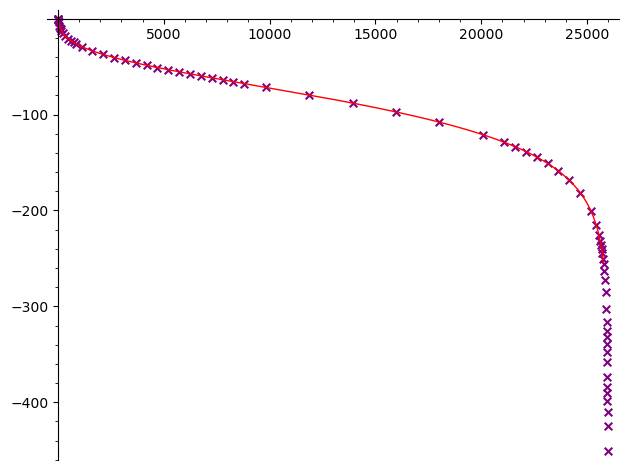

In [17]:
# survival function of D when dlsc is drawn as a normal with mean avg_dlsc and standard deviation sdv_dlsc (approximation)

def sv_D(T):
    T = RR(T)
    
    # compute the bound of i
    bi_inf = RR(0)
    bi_sup = RR(sqrt(beta1)*q/2)
    bi_cur = RR((bi_inf + bi_sup)/2)
    while bi_sup - bi_inf > 0.000000001:
        if B(RR(beta1/RR(2)),RR(RR(RR(2)*pi*dlat*bi_cur)/RR(q))) >= RR(T/N):
            bi_inf = bi_cur
        else :
            bi_sup = bi_cur
        bi_cur = RR((bi_inf + bi_sup)/RR(2))
    bi = bi_sup

    VolLat_lat = RR(-beta1*m/(m+nlat)) * RR(log(RR(q),2)) + RR(beta1*(m+nlat-beta1)) * RR(log(RR(root_Hermite(beta0)), 2))
    VolLat_lsc = RR(- kfft)*RR(log(RR(q), 2)) 
    VolLat = RR(VolLat_lat + VolLat_lsc)

    def sv_D_Sphere(dlsc):
        def func_j(ii):
            ii = RR(ii)
            Bi = B(RR(beta1/RR(2)),RR(RR(RR(2)*pi*dlat*ii)/RR(q)))
        
            # compute j such that int_0^oo psi(dlsc) B(j) ddlsc = T/N/B(i)
            Thres = RR(T/N/Bi)
            j_inf = RR(0)
            j_sup = RR(sqrt(nfft)*q/2)
            j_cur = RR((j_inf + j_sup)/2)
            while j_sup - j_inf > 0.000000001:
                if B(RR(nfft/RR(2))-RR(1),RR(RR(RR(2)*pi*dlsc*j_cur)/RR(q))) >= Thres:              
                    j_inf = j_cur
                else :
                    j_sup = j_cur
                j_cur = RR((j_inf + j_sup)/RR(2))
            return j_sup
        
        def VolWrong(ii):
            VolSphere_i = RR(1) + RR(beta1/2) * RR(log(pi, 2)) + RR(beta1-1)*RR(log(RR(ii), 2)) - RR(log(RR(gamma(RR(beta1/2))), 2))
            jj = RR(func_j(ii))
            VolBall_j = RR(nfft/2) * RR(log(pi, 2)) + RR(nfft)*RR(log(RR(jj), 2)) - RR(log(RR(gamma(RR(nfft/2 + 1))), 2))
            return RR(RR(2)^RR(VolSphere_i + VolBall_j))
        
        res = 0
        step = RR(bi/12.0)
        ii = RR(0)
        while ii <= bi+0.0000001:
            res += RR(step * VolWrong(ii))
            ii += RR(step)
        #res = RR(numerical_integral(Nij_eq_one, 0, bi)[0]
        return min(0, float(VolLat + log(res, 2)))

    res = RR(0)
    norm = RR(0)
    step = RR((3.0*sdv_dlsc)/12.0)
    dlsc = RR(avg_dlsc-3.0*sdv_dlsc)
    while dlsc <= avg_dlsc+3.0*sdv_dlsc+0.0000001:
        prob = RR(exp(RR(-0.5 * ((dlsc-avg_dlsc)/sdv_dlsc)^RR(2))) / RR(sdv_dlsc*sqrt(2*pi)))
        norm += RR(prob * step)
        res += RR(step * prob * (RR(2)^RR(sv_D_Sphere(dlsc))))
        dlsc += RR(step)
    return float(log(res/norm, 2))

L_sv_D = []
i = -1
T = 0
step = 1
while(True):
    if T>=N:
        break
    val = [T,sv_D(T)]
    print(val,",")
    L_sv_D.append(val)
    i += 1
    T += step
    pente = float(L_sv_D[i-1][1] - L_sv_D[i][1])
    if pente > 10 and step > 1:
        step /= 2
    if pente < 2:
        step *= 2
        
sv_D = spline(L_sv_D)

(plot(sv_D, 0, N, color='red') + list_plot(L_sv_D, color='purple', size=30, marker='x')).show()


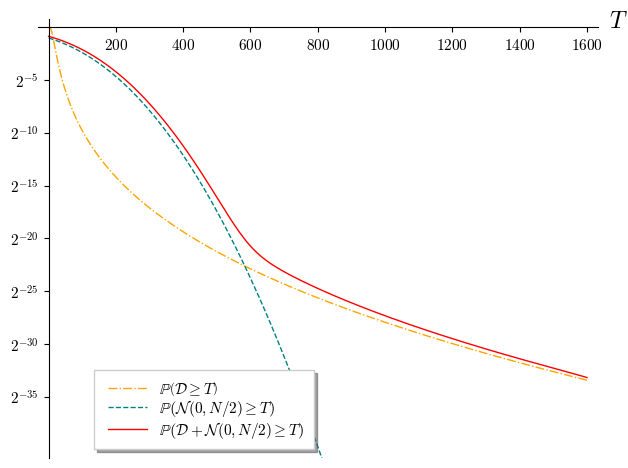

In [20]:
def sv_N(T):
    T = RR(T)
    res = RR(RR(RR(1) - RR(erf(RR(T/RR(sqrt(N))))))/RR(2))
    return log(res, 2)

def sv_F(T):
    T = RR(T)
    tmp1 = RR(0.5) - RR(0.5)*erf(RR(T/RR(sqrt(N))))
    tmp2 = (1/sqrt(pi * N))*numerical_integral( lambda t : exp(RR(log(2, e)*sv_D(t)) - RR((T-t)*(T-t)/N)), 0, 1727)[0]
    return log(tmp1 + tmp2, 2)
    
T_max_curve = 1600

plt_fall = plot(sv_N, 0, T_max_curve, ymin=-40, color='teal', linestyle='--', legend_label='$\\mathbb{P}\\left(\\mathcal{N}\\left(0, N/2\\right) \\geq T\\right)$')
plt_Pwrong = plot(sv_F, 0, T_max_curve, color='red', linestyle='-', legend_label='$\\mathbb{P}\\left( \\mathcal{D} + \\mathcal{N}\\left(0, N/2\\right)\\geq T\\right)$')
plt_floor = plot(sv_D, 0, T_max_curve, color='orange', linestyle='-.', legend_label='$\\mathbb{P}\\left(\\mathcal{D} \\geq T\\right)$', axes_labels=['$T$', ''], ticks=[[200,400,600,800,1000,1200,1400,1600],[-5,-10,-15,-20,-25, -30, -35]], tick_formatter=[["$200$","$400$","$600$","$800$","$1000$","$1200$","$1400$","$1600$"], ["$2^{-5}$","$2^{-10}$","$2^{-15}$","$2^{-20}$","$2^{-25}$","$2^{-30}$","$2^{-35}$"]], fontsize=11)

plt_theo = plt_floor + plt_fall + plt_Pwrong
plt_theo.set_legend_options(handlelength=3.2, loc=(0.1,0.02), font_size=11)
plt_theo.show()

Pwrong_q241_m40_n43_nfft8_kfft3_nlat35_beta032_beta144_N25971.out


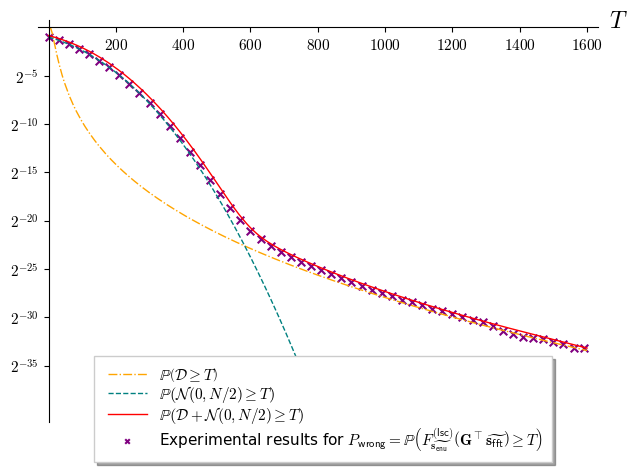

In [21]:
# experiments
path="data/"
filename = "Pwrong_q{}_m{}_n{}_nfft{}_kfft{}_nlat{}_beta0{}_beta1{}_N{}.out".format(int(q),int(m),int(n),int(nfft),int(kfft),int(nlat),int(beta0),int(beta1),int(N))
isfile = os.path.isfile(path + filename)
print("" + filename)
if(isfile):
    text_file = open(os.path.join(path, filename), 'r')
    
    myline = text_file.readline()
    i = 0
    j = 0
    data = []
    while myline:
        if i >= 16:
            if float(myline[:-1]) > 0.0:
                if j%30 == 0 and j < 1599:
                    data.append([float(j),log(float(myline[:-1]),2) ])
            j += 1
        i+=1
        myline = text_file.readline()
        
    plt_exp = list_plot(data,xmax=T_max_curve, color='purple', size=30, marker='x', legend_label='Experimental results for $P_{\\mathsf{wrong}} = \\mathbb{P}\\left( F^{(\\mathsf{lsc})}_{\\widetilde{\\mathbf{s}_{\\mathsf{enu}}}} \\left( \\mathbf{G}^{\\top} \\widetilde{\\mathbf{s}_{\\mathsf{fft}}} \\right) \\geq T \\right)$')


    plt = plt_theo + plt_exp
    plt.set_legend_options(handlelength=3.2, loc=(0.1,-0.1), font_size=11)
    plt.show()
    
    plt.save(path+"simulations_"+filename[:-4]+".pdf")
